In [18]:
import ROOT as rt
from larcv import larcv
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

In [2]:
# Specify location of dataset
#dataset = "/home/phy68/data/practice_test_5k.root"
dataset = "practice_test_5k.root"

In [3]:
# Get a look of the ROOT Trees inside the file
f = rt.TFile(dataset) # open file
f.ls() # print contents
f.Close() # close file (since we dont intend to interact with file directly)

TFile**		practice_test_5k.root	
 TFile*		practice_test_5k.root	
  KEY: TTree	image2d_data_tree;1	data tree
  KEY: TTree	particle_mctruth_tree;1	mctruth tree


In [4]:
# create instance of IOManager that will interface with file
io = larcv.IOManager(larcv.IOManager.kREAD,"input",larcv.IOManager.kTickForward)
io.add_in_file( dataset )
io.initialize()

True

    [NORMAL]  <input::prepare_input> Opening a file in READ mode: practice_test_5k.root
    [NORMAL]  <input::initialize> Prepared input with 5000 entries...


Warning in <TStreamerInfo::Build>: larcv::EventParticle: base class larcv::ParticleSet has no streamer or dictionary it will not be saved


In [5]:
# Define dictionary for interpretting class label
labelname = {0:"proton",
            1:"electron",
            2:"pion",
            3:"muon",
            4:"photon"}

In [6]:
NENTRIES = io.get_n_entries()
entry_list = np.random.randint(0,NENTRIES-1,size=10)
print(entry_list)

[1506 4898 1075 3072 1299  390 3710 4733 2432 3860]


ENTRY[1506] PDG=22
('vtx: ', (4.1924339999999995, 109.31696699999999, 95.81875699999999, 1530.134677))
('imgcoord: ', (8.384867999999999, 191.63751399999998))
ENTRY[4898] PDG=2212
('vtx: ', (120.373483, 115.231455, 104.627838, 1281.617736))
('imgcoord: ', (240.746966, 209.255676))
ENTRY[1075] PDG=22
('vtx: ', (112.991289, 54.872046, 59.672467999999995, 85.53390399999999))
('imgcoord: ', (225.982578, 119.34493599999999))


/home/twongjirad/.local/lib/python2.7/site-packages/ipykernel_launcher.py:18: DeprecationWarning: PyArray_FromDimsAndDataAndDescr: use PyArray_NewFromDescr.


ENTRY[3072] PDG=211
('vtx: ', (82.102567, 57.925163999999995, 38.412284, 1590.003585))
('imgcoord: ', (164.205134, 76.824568))
ENTRY[1299] PDG=22
('vtx: ', (66.053546, 37.407447, 74.360845, 1407.591246))
('imgcoord: ', (132.107092, 148.72169))
ENTRY[390] PDG=11
('vtx: ', (39.136026, 12.724668999999999, 26.739403, 848.4551409999999))
('imgcoord: ', (78.272052, 53.478806))
ENTRY[3710] PDG=211
('vtx: ', (23.504203999999998, 45.515595, 52.249834, 42.712306))
('imgcoord: ', (47.008407999999996, 104.499668))
ENTRY[4733] PDG=2212
('vtx: ', (121.15338999999999, 107.416176, 92.636482, 66.10136))
('imgcoord: ', (242.30677999999997, 185.272964))
ENTRY[2432] PDG=13
('vtx: ', (6.320377, 69.48911, 37.773047, 1046.509456))
('imgcoord: ', (12.640754, 75.546094))
ENTRY[3860] PDG=211
('vtx: ', (76.63694, 19.162855999999998, 73.898592, 1298.645687))
('imgcoord: ', (153.27388, 147.797184))


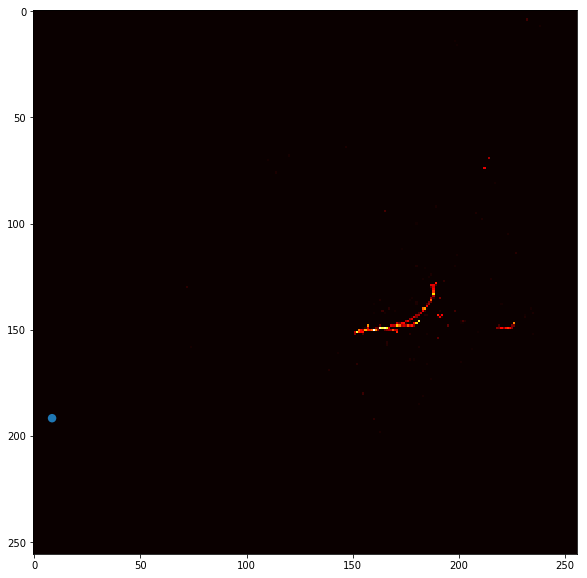

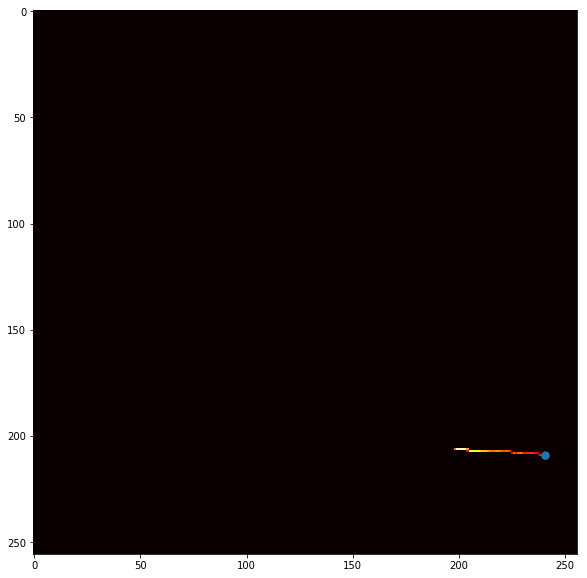

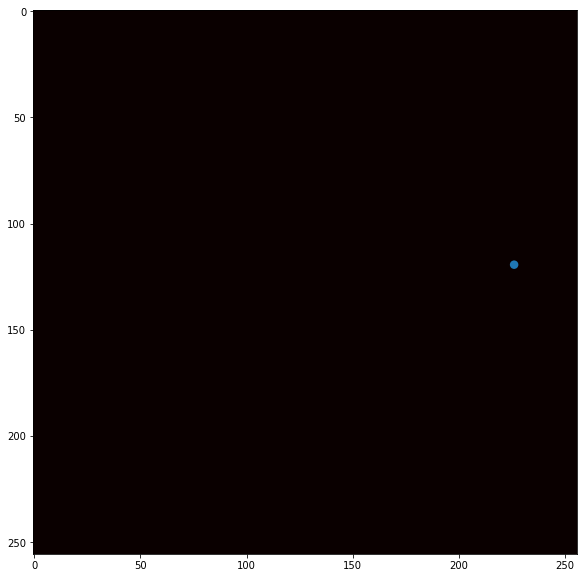

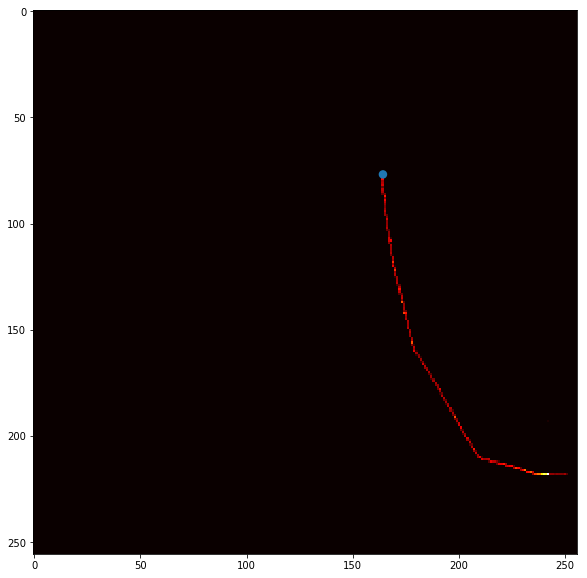

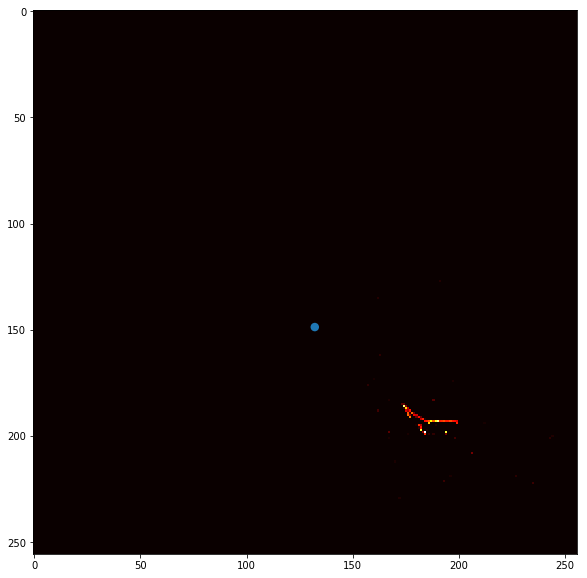

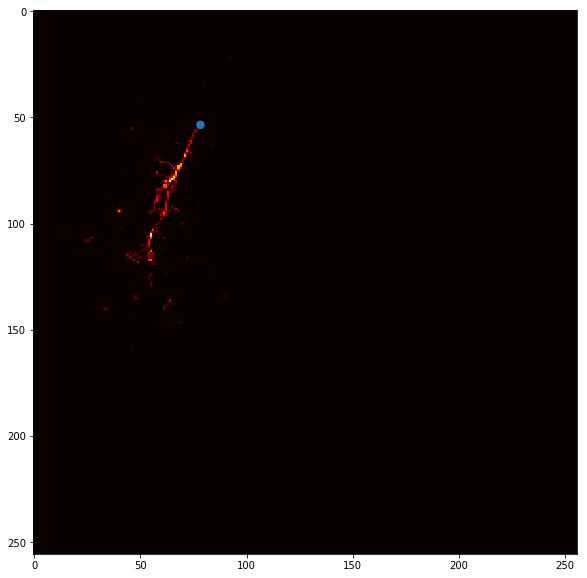

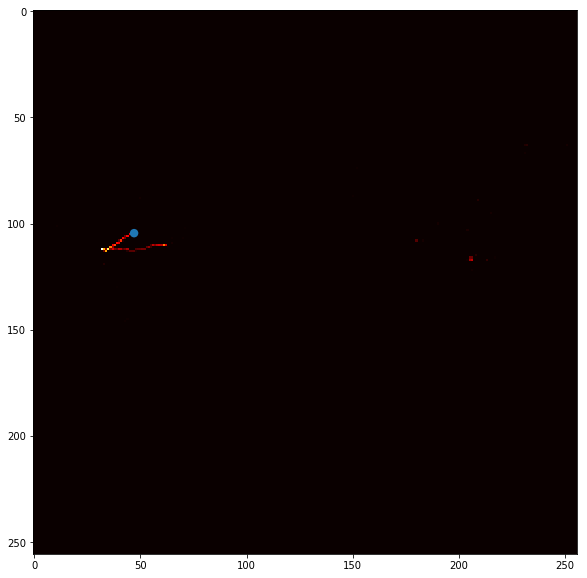

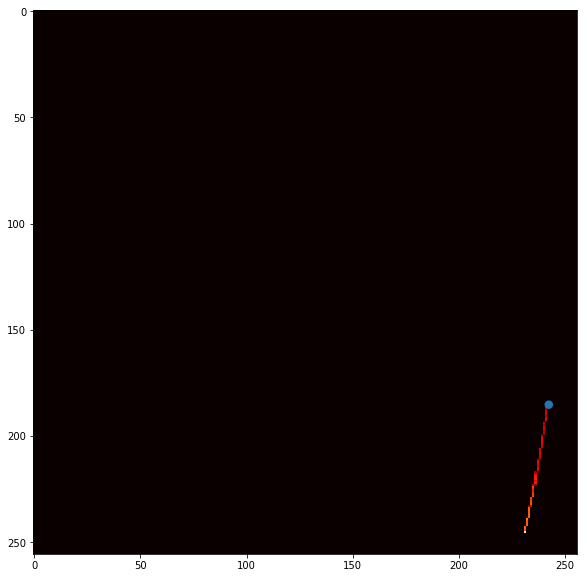

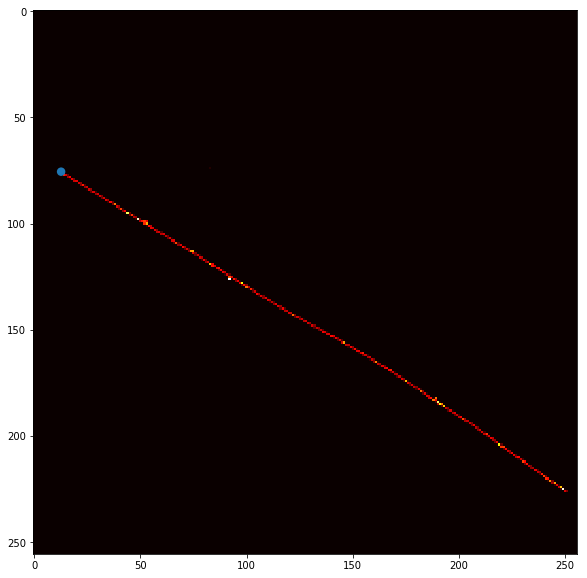

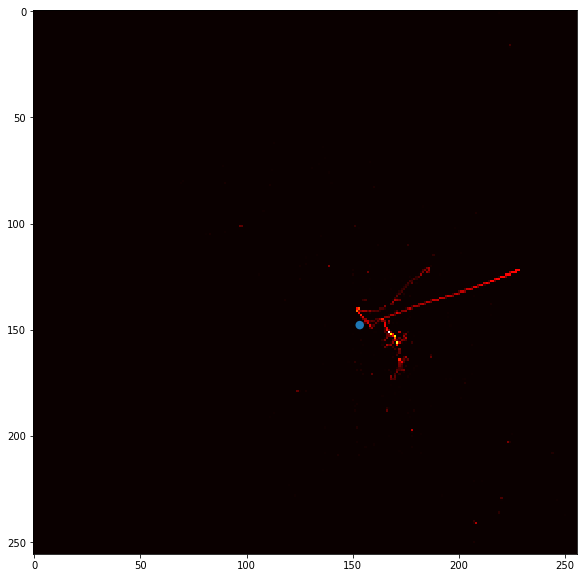

In [21]:
for n,entry in enumerate(entry_list.tolist()):
    
    io.read_entry(entry)
    ev_data = io.get_data(larcv.kProductImage2D,"data")
    ev_particle = io.get_data(larcv.kProductParticle, "mctruth")
    mcpart = ev_particle.as_vector().at(0)
    pdg = ev_particle.as_vector().at(0).pdg_code()
    
    print("ENTRY[%d] PDG=%d"%(entry,pdg))
    
    print("vtx: ",(mcpart.x(),mcpart.y(),mcpart.z(),mcpart.t()))
    pix = (mcpart.x()*2,mcpart.z()*2)
    print("imgcoord: ",pix)
    
    c = Circle((pix[0],pix[1]),2)
    
    img = ev_data.at(2)
    np_img = larcv.as_ndarray(img)
    
    fig, ax = plt.subplots(1,1,figsize=(10, 10))
    ax.add_patch(c)
    #img = imgbatch[ib,:].reshape(256,256)
    #imgout = padandcropandflip(img)
    #print("LABEL[%d]: "%(ib),labelname[np.argmax(lbl[ib])])
    ax.imshow(np_img, cmap='hot', interpolation='nearest')
    fig.show()